Importación de librerias

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Comprensión de los datos

## Cargado de los datos

In [35]:
df = pd.read_csv('bike_buyers.csv')

## Inspección de los datos

In [36]:
df.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [37]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [38]:
#ajuste en el tipo de datos para manejo simplificado
df['Marital Status'] = df['Marital Status'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Home Owner'] = df['Home Owner'].astype('category')
df['Commute Distance'] = df['Commute Distance'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Purchased Bike'] = df['Purchased Bike'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                1000 non-null   int64   
 1   Marital Status    993 non-null    category
 2   Gender            989 non-null    category
 3   Income            994 non-null    float64 
 4   Children          992 non-null    float64 
 5   Education         1000 non-null   category
 6   Occupation        1000 non-null   category
 7   Home Owner        996 non-null    category
 8   Cars              991 non-null    float64 
 9   Commute Distance  1000 non-null   category
 10  Region            1000 non-null   category
 11  Age               992 non-null    float64 
 12  Purchased Bike    1000 non-null   category
dtypes: category(8), float64(4), int64(1)
memory usage: 48.2 KB


## Visualización de los datos

In [39]:
numeric_cols = df.drop('ID', axis=1).select_dtypes(include='number').columns
categoric_cols = df.drop(numeric_cols, axis=1).columns

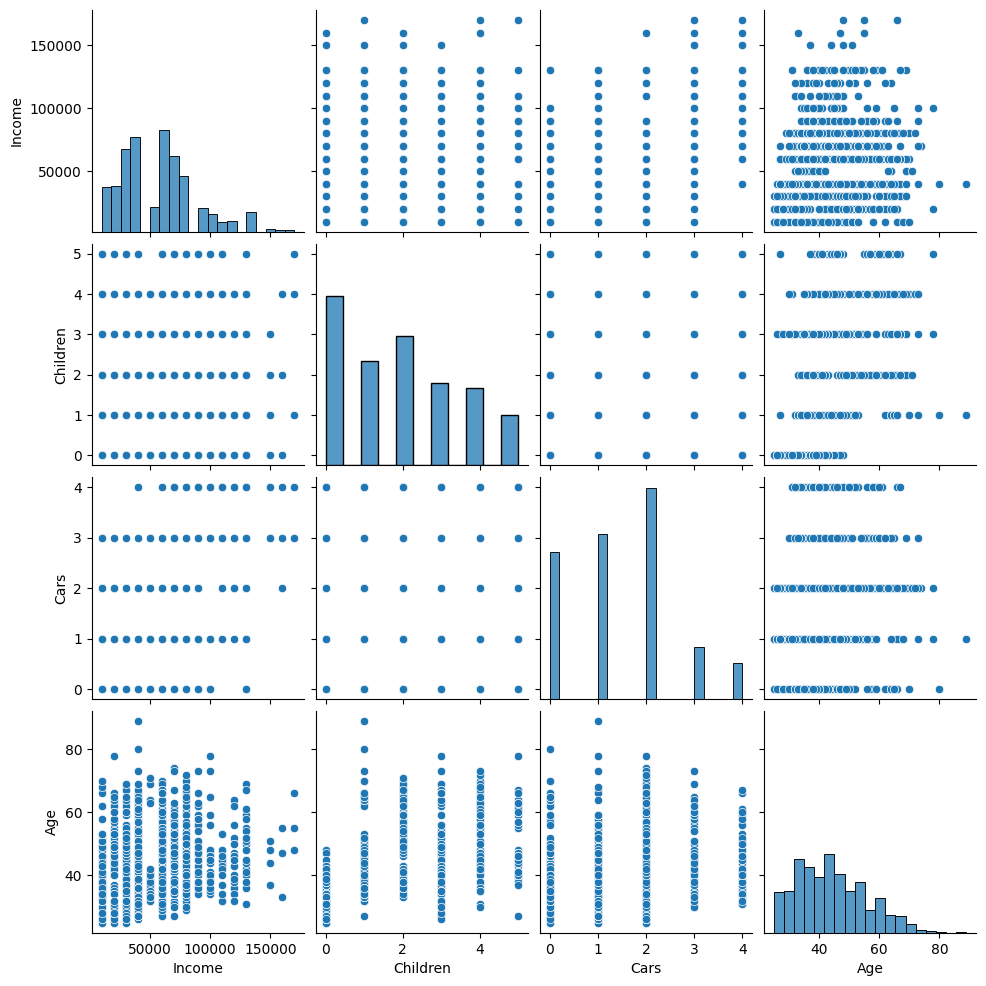

In [40]:
sns.pairplot(df[numeric_cols])

<bound method Figure.show of <Figure size 1000x800 with 4 Axes>>

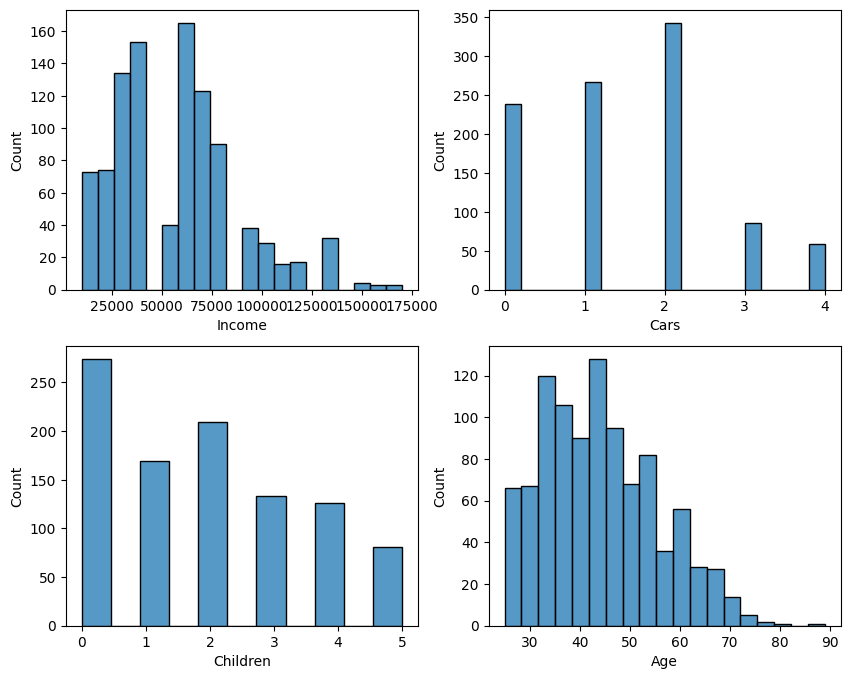

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i in range(len(numeric_cols)):
    sns.histplot(data=df[numeric_cols[i]], ax= axes[i%2,int(i/2)])
fig.show

<Axes: >

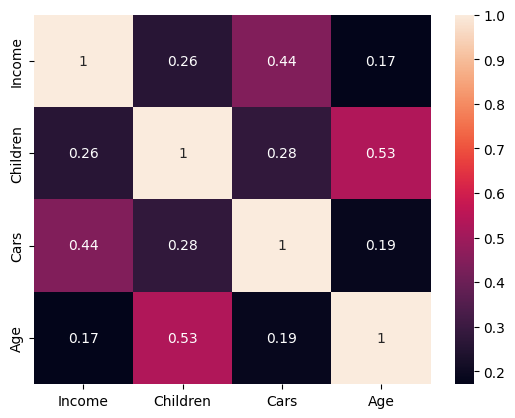

In [42]:
sns.heatmap(df[numeric_cols].corr(), annot=True)

# Preprocesamiento de los datos

## Calidad de los datos

In [43]:
#Datos repetidos?
len(df['ID'].unique()) != len(df['ID'])

False

In [44]:
#elimina columnas con un porcentaje de datos faltantes mayor a 20%
percent = 0.20
df = df.dropna(thresh = df.shape[0] - np.ceil(df.shape[0] * percent), axis=1)
print(list(df.columns))

['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age', 'Purchased Bike']


In [45]:
#Crear una copia de ID y Purchased Bike
df['Purchased Bike'].replace({'No': 0, 'Yes': 1}, inplace=True)
df_index = df[['ID', 'Purchased Bike']]
df_index.columns = ['ID', 'Target']
df = df.drop(['ID'], axis = 1)

In [46]:
df_index.to_csv('index_data.csv',sep=';', index=False)

## Tratamiento de datos faltantes

In [47]:
#separamos las variables numericas de las no numericas
numeric_cols = df.select_dtypes(include='number').columns
categoric_cols = df.select_dtypes(include='category').columns

In [48]:
#Revisar que no exista un error de ingreso
for col in categoric_cols:
    categorias = df[col].cat.categories
    print(f"{col}:\n{[c for c in categorias]}")

Marital Status:
['Married', 'Single']
Gender:
['Female', 'Male']
Education:
['Bachelors', 'Graduate Degree', 'High School', 'Partial College', 'Partial High School']
Occupation:
['Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual']
Home Owner:
['No', 'Yes']
Commute Distance:
['0-1 Miles', '1-2 Miles', '10+ Miles', '2-5 Miles', '5-10 Miles']
Region:
['Europe', 'North America', 'Pacific']
Purchased Bike:
[0, 1]


In [49]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    df_outliers = df[(df[col] < min) | (df[col] > max)][col]
    print(str(col), df_outliers.shape[0])

Income 10
Children 0
Cars 59
Age 4


In [50]:
for col in numeric_cols:
    df[col].fillna(value=df[col].median(), inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Marital Status    993 non-null    category
 1   Gender            989 non-null    category
 2   Income            1000 non-null   float64 
 3   Children          1000 non-null   float64 
 4   Education         1000 non-null   category
 5   Occupation        1000 non-null   category
 6   Home Owner        996 non-null    category
 7   Cars              1000 non-null   float64 
 8   Commute Distance  1000 non-null   category
 9   Region            1000 non-null   category
 10  Age               1000 non-null   float64 
 11  Purchased Bike    1000 non-null   category
dtypes: category(8), float64(4)
memory usage: 40.4 KB


In [52]:
#Reemplazar valores categoricos faltantes por la moda
for col in categoric_cols[0:]:
    df[col].fillna(value=df[col].mode()[0], inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Marital Status    1000 non-null   category
 1   Gender            1000 non-null   category
 2   Income            1000 non-null   float64 
 3   Children          1000 non-null   float64 
 4   Education         1000 non-null   category
 5   Occupation        1000 non-null   category
 6   Home Owner        1000 non-null   category
 7   Cars              1000 non-null   float64 
 8   Commute Distance  1000 non-null   category
 9   Region            1000 non-null   category
 10  Age               1000 non-null   float64 
 11  Purchased Bike    1000 non-null   category
dtypes: category(8), float64(4)
memory usage: 40.4 KB


In [54]:
#data necesaria para Requerimientos
df.to_csv('requirement_data.csv',sep=';', index=False)

## Creación de columnas

In [55]:
#Se trata de un rango por lo cual tambien se puede tratar como una variable jerarquica
df['Commute Distance Num'] = df['Commute Distance'].replace({'0-1 Miles': 1,'1-2 Miles': 2, '2-5 Miles': 3, '5-10 Miles': 4, '10+ Miles': 5}).astype('int64')

In [56]:
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler


df['Income suavizado'] = round(df['Income'].rolling(window=3, center=True).mean(), 4)
df['Income suavizado'].fillna(df['Income suavizado'].mean(), inplace=True)

df['Commute Distance Num'] = df['Commute Distance Num'].astype('category').cat.codes
df['Income Log'] = round(np.log(df['Income'] + 1), 6)
minimo = df['Income Log'].min()
maximo = df['Income Log'].max()
df['Income Normal Log'] = (df['Income Log'] - minimo) / (maximo - minimo)
df['Income Boxcox'], _ = boxcox(df['Income'])
df['Age Log'] = round(np.log(df['Age'] + 1), 4)
df['Age Children'] = df['Age'] * df['Children']
df['Cars Distance'] = df['Cars'] * df['Commute Distance Num']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Marital Status        1000 non-null   category
 1   Gender                1000 non-null   category
 2   Income                1000 non-null   float64 
 3   Children              1000 non-null   float64 
 4   Education             1000 non-null   category
 5   Occupation            1000 non-null   category
 6   Home Owner            1000 non-null   category
 7   Cars                  1000 non-null   float64 
 8   Commute Distance      1000 non-null   category
 9   Region                1000 non-null   category
 10  Age                   1000 non-null   float64 
 11  Purchased Bike        1000 non-null   category
 12  Commute Distance Num  1000 non-null   int8    
 13  Income suavizado      1000 non-null   float64 
 14  Income Log            1000 non-null   float64 
 15  Incom

In [58]:
#separamos las variables numericas de las no numericas
numeric_cols = df.select_dtypes(include='number').columns
categoric_cols = df.select_dtypes(include='category').columns

In [59]:
categoric_cols.to_list()

['Marital Status',
 'Gender',
 'Education',
 'Occupation',
 'Home Owner',
 'Commute Distance',
 'Region',
 'Purchased Bike']

In [60]:
categorical=pd.get_dummies(df[categoric_cols], columns=categoric_cols, drop_first=True)
categorical.head()

,Marital Status_Single,Gender_Male,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Home Owner_Yes,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_North America,Region_Pacific,Purchased Bike_1
0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [61]:
categorical.columns = [
    'Marital Status',
    'Gender',
    'Education_1',
    'Education_2',
    'Education_3',
    'Education_4',
    'Occupation_1',
    'Occupation_2',
    'Occupation_3',
    'Occupation_4',
    'Home Owner',
    'Commute Distance_1',
    'Commute Distance_2',
    'Commute Distance_3',
    'Commute Distance_4',
    'Region_1',
    'Region_2',
    'Target'
]

In [62]:
processed_data = pd.merge(df, categorical, left_index=True, right_index=True)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Marital Status_x      1000 non-null   category
 1   Gender_x              1000 non-null   category
 2   Income                1000 non-null   float64 
 3   Children              1000 non-null   float64 
 4   Education             1000 non-null   category
 5   Occupation            1000 non-null   category
 6   Home Owner_x          1000 non-null   category
 7   Cars                  1000 non-null   float64 
 8   Commute Distance      1000 non-null   category
 9   Region                1000 non-null   category
 10  Age                   1000 non-null   float64 
 11  Purchased Bike        1000 non-null   category
 12  Commute Distance Num  1000 non-null   int8    
 13  Income suavizado      1000 non-null   float64 
 14  Income Log            1000 non-null   float64 
 15  Incom

In [63]:
processed_data.to_csv('processed_data.csv',sep=';', index=False)

# Requerimientos

1. ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

<Axes: xlabel='Purchased Bike', ylabel='Income'>

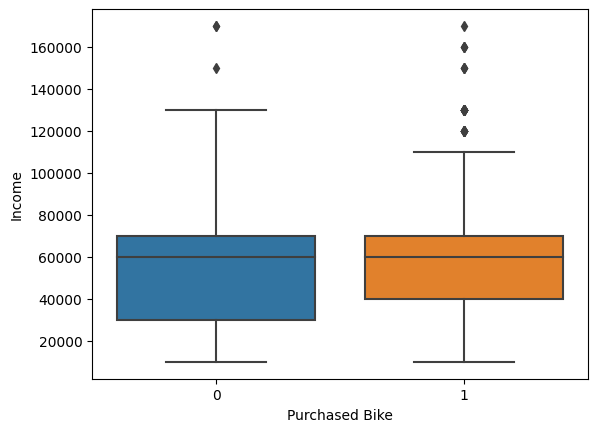

In [88]:
sns.boxplot(x='Purchased Bike', y='Income', data=df)

In [89]:
income_compra = df.groupby('Purchased Bike')
income_compra['Income'].mean()

Purchased Bike
0    54874.759152
1    57817.047817
Name: Income, dtype: float64

2. ¿Cuánto es el promedio de ingresos según el estado civil del cliente?

<Axes: xlabel='Marital Status', ylabel='Income'>

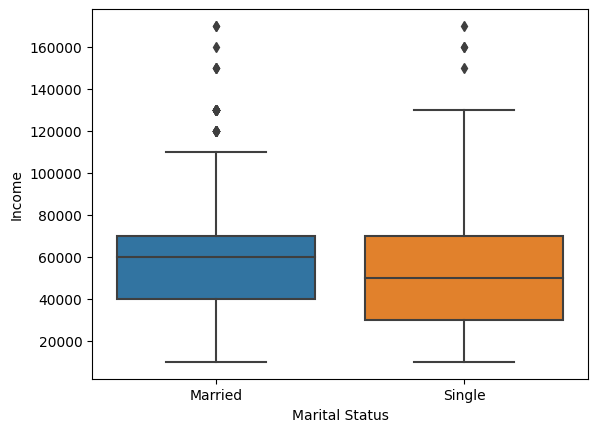

In [90]:
sns.boxplot(x='Marital Status', y='Income', data=df)

In [91]:
df_marital_status = df.groupby('Marital Status')
df_marital_status['Income'].mean()

Marital Status
Married    58653.136531
Single     53493.449782
Name: Income, dtype: float64

3. Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

In [92]:
df['Con_hijos'] = df['Children'].apply(lambda x: 'Si' if x > 0 else 'No' if x == 0 else np.nan)

In [93]:
df[['Children', 'Con_hijos']].head(10)

,Children,Con_hijos
0,1.0,Si
1,3.0,Si
2,5.0,Si
3,0.0,No
4,0.0,No
5,2.0,Si
6,2.0,Si
7,1.0,Si
8,2.0,Si
9,2.0,Si


<Axes: xlabel='Education', ylabel='Children'>

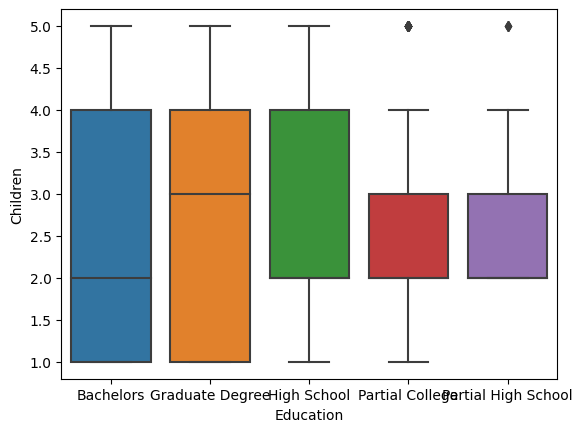

In [94]:
df_con_hijos = df[df['Con_hijos'] == 'Si']
sns.boxplot(x='Education', y='Children', data=df_con_hijos)

In [95]:
df_nivel_edu = df_con_hijos.groupby('Education')
df_nivel_edu['Children'].mean()

Education
Bachelors              2.538462
Graduate Degree        2.742188
High School            2.763780
Partial College        2.567708
Partial High School    2.711111
Name: Children, dtype: float64

4. Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

In [96]:
df['Con_vehiculo'] = df['Cars'].apply(lambda x: 'Si' if x > 0 else 'No' if x == 0 else np.nan)
df[['Cars', 'Con_vehiculo']].head(10)

,Cars,Con_vehiculo
0,0.0,No
1,1.0,Si
2,2.0,Si
3,1.0,Si
4,0.0,No
5,0.0,No
6,4.0,Si
7,0.0,No
8,2.0,Si
9,1.0,Si


<Axes: xlabel='Occupation', ylabel='Cars'>

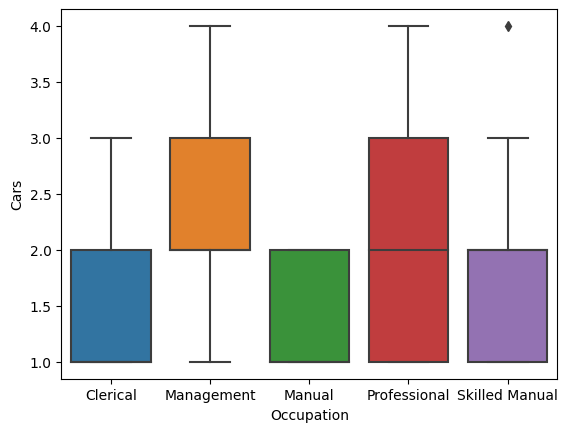

In [97]:
df_con_vehiculo = df[df['Con_vehiculo'] == 'Si']
sns.boxplot(x='Occupation', y='Cars', data=df_con_vehiculo)

In [98]:
df_ocupation = df_con_vehiculo.groupby('Occupation')
df_ocupation['Cars'].mean()

Occupation
Clerical          1.480000
Management        2.345912
Manual            1.441860
Professional      2.126126
Skilled Manual    1.712821
Name: Cars, dtype: float64

5. ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?

<Axes: xlabel='Home Owner', ylabel='Age'>

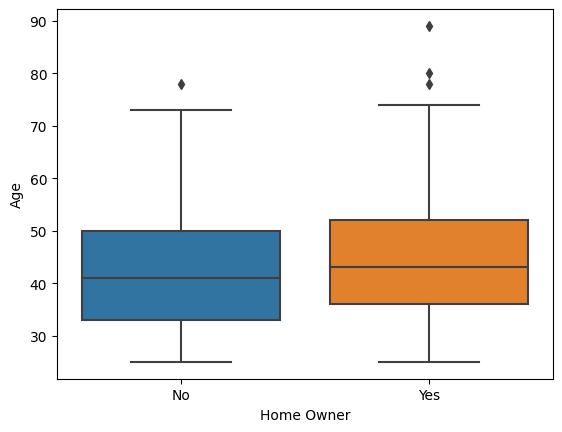

In [99]:
sns.boxplot(x=df['Home Owner'], y=df['Age'], data=df)

In [100]:
df_home = df.groupby('Home Owner')
df_home['Age'].mean()

Home Owner
No     42.308917
Yes    45.024781
Name: Age, dtype: float64

# VERSIONES

Para el modelo no se tomaron las nuevas columnas creadas para realizar los requerimientos.

In [101]:
df = df.drop([
    'Income',
    'Income suavizado',
    'Income Boxcox',
    'Income Normal Log',
    'Age',
    'Occupation_1',
    'Occupation_2',
    'Occupation_3',
    'Occupation_4',
    'Children'
], axis=1)

KeyError: ignored

In [ ]:
df = df.drop([
    'Income',
    'Income suavizado',
    'Income Boxcox',
    'Income Normal Log',
    'Age',
    'Occupation_1',
    'Occupation_2',
    'Occupation_3',
    'Occupation_4',
    'Children',
    'Cars Distance',
    'Commute Distance_1',
    'Commute Distance_2',
    'Commute Distance_3',
    'Commute Distance_3',
    'Commute Distance_4',
], axis=1)

In [ ]:
df = df.drop([
    'Income',
    'Income suavizado',
    'Income Boxcox',
    'Income Normal Log',
    'Age',
    'Occupation_1',
    'Occupation_2',
    'Occupation_3',
    'Occupation_4',
    'Children',
    'Cars',
    'Cars Distance',
], axis=1)